<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 1</h2><br/>
<h1>Inferencia Estadística</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>

</div>

# Tipos de errores

Para determinar el correcto funcionamiento de un algoritmo de clasificación, podemos preguntarnos

- *¿Cuántas veces acertamos la clasificación de una clase y cuántas veces no?*

Los errores que puede cometer nuestro clasificador son de dos tipos:

## Errores de Tipo 1: Falso Positivo

Clasificamos un elemento como *perteneciente* (positivo) a la clase **incorrectamente** (falso)

<img src="images/un5.jpeg" alt="" width="300px" align="center"/>

## Errores de Tipo 2: Falso Negativo

Clasificamos un elemento como *no perteneciente* (negativo) a la clase **incorrectamente** (falso)

<img src="images/noUn5.jpeg" alt="" width="300px" align="center"/>

# Matriz de confusión

Permite contar la cantidad de veces que instancias de la clase A son clasificadas como clase B

<img src="images/matrizConfusion.png" alt="" width="700px" align="center"/>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow", O'Reilly

## Ejemplo

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Primera vez que se importa la biblioteca de aprendizaje automático scikit-learn
# No te preocupes si esto parece mucho código
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ten en cuenta que es probable que el nombre del archivo sea diferente en tu computadora (especialmente más adelante en el curso)
filename = 'data/titanic.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:

# Transforma la columna Sexo en una forma que no sea de texto
# Elijo cuatro funciones, podrías haber elegido otras
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']
# Convierta la columna Sexo en algo que pueda alimentar a un modelo
# Tiene
df['Sex'] = df.Sex.map({'male': 0, 
                                  'female': 1})
# Eliminar filas donde la edad es nan del conjunto de datos
df = df.loc[~df['Age'].isnull(), :]
# Crear matriz de características y vector objetivo
X = df.loc[:, feature_cols]
y = df['Survived']
# Divida los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)
# Estandarizar datos
scaler = StandardScaler()
# Ajusta solo en el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transformación tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Crea una instancia de un modelo
logreg = LogisticRegression()
# Entrena el modelo con los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)
print(predictions)
print(y_test.tolist())

[1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [15]:
# valores reales: y_test.values
# predicciones: predicciones del modelo
cm = metrics.confusion_matrix(y_test.values, predictions)
print(metrics.confusion_matrix(y_test.values, predictions).ravel())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.values, predictions).ravel()
print(cm)
print(tn, fp, fn, tp)

[87 16 17 59]
[[87 16]
 [17 59]]
87 16 17 59


# Accuracy (exactitud)

- Fracción de casos correctamente clasificados sobre casos totales (¿Cuántas veces acerté?)

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- En nuestra matriz de confusión anterior, sería

$$\text{accuracy} = \frac{87 + 59}{87 + 16 + 17 + 59} = 0.8156 = 81.56\%$$

In [17]:
score = logreg.score(X_test, y_test) # Esta línea, para este modelo, calcula el accuracy
print("Score obtenido por Regresor", score)
manual_score = (tp + tn)/(tp + tn + fp + fn)
print("Score obtenido manualmente", manual_score)

Score obtenido por Regresor 0.8156424581005587
Score obtenido manualmente 0.8156424581005587


In [20]:
# Ej. Modelo de clasificación de 5s
import numpy as np
datos = [1,2,1,3,4,2,5,3,4,6,5,4,2,7,9,8,9,6,4,5]
predicciones = np.zeros(20)
valores_reales= [0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1]
print(predicciones)
print(valores_reales)
# Nuestro modelo clasifica todo como NO 5
tn=17 # 17 son los números que no eran 5, por lo tanto nuestro modelo los clasifico bien
tp=0 # Como no clasificamos ningún 5, los TP son
fn=3 # Los 5s que clasificamos incorrectamente, están acá
fp=0 # No hicimos ninguna claisificación FP.

accuracy = (tn+tp)/(tn+tp+fn+fp)
print(accuracy*100)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
85.0


# Sensitivity/Recall/True Positive Rate (sensibilidad)

- Fracción de casos **pertenecientes** a una clase correctamente clasificados (¿Cuántas veces acerté al clasificar la clase X?)

$$ \text{sensitivity} = \frac{TP}{TP + FN} $$

# Specifity/Selectivity/True Negative Rate (especificidad)

- Fracción de casos **no pertenecientes** a una clase correctamente clasificados (¿Cuántas veces acerté al clasificar casos fuera de la clase X?)

$$ \text{specificity} = \frac{TN}{TN + FP} $$

# Precision/Positive predictions (precisión)

- Fracción de casos **clasificados** correctamente clasificados (¿Cuántos casos clasificados como X fueron acertados?)

$$ \text{precision} = \frac{TP}{TP + FP} $$

In [19]:
# Calcular sensibilidad, especificidad
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))
print('Precision: {:.3f}'.format(precision))

Sensitivity: 0.776
Specificity: 0.845
Precision: 0.787


# Histogramas

- Gráfico que permite mostrar visualmente cuántos elementos pertenecen a una cierta categoría.
- Las categorías pueden ser **clases** o **rangos numéricos**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
filename = 'data/kingCountyHouseData.csv'
df = pd.read_csv(filename)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


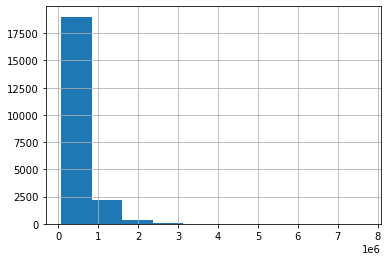

In [24]:
df['price'].hist()
plt.show()

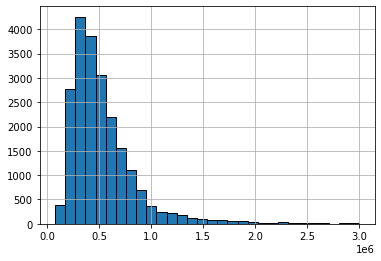

In [26]:
price_filter = df.loc[:, 'price'] <= 3000000
df.loc[price_filter, 'price'].hist(bins = 30,
                                   edgecolor='black')
plt.show()

# Box Plot (diagramas de caja)

- Gráfico que permite resumir la distribución de los valores de una muestra
<img src="images/boxplot.png" alt="" width="700px" align="center"/>

Fuente: [Towards Data Science: Understanding boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = 'data/wisconsinBreastCancer.csv'
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


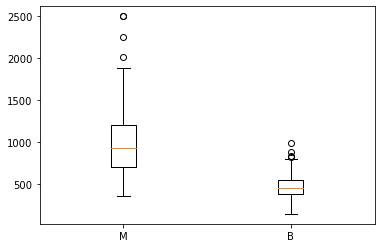

In [29]:
malignant = df.loc[df['diagnosis']=='M','area_mean'].values
benign = df.loc[df['diagnosis']=='B','area_mean'].values
plt.boxplot([malignant,benign], labels=['M', 'B']);

Material adicional: Excelente explicación de los distintos elementos de un boxplot [aquí](https://www.youtube.com/watch?v=O4wx-J5g4Nc)

# Muestreo

Selección de un subconjunto de instancias (muestra) a partir de un conjunto de datos

## Muestreo con reemplazo

<img src="images/sampleWithReplacement.png" alt="" width="250px" align="center"/>

## Muestreo sin reemplazo

<img src="images/sampleWithoutReplacement.png" alt="" width="250px" align="center"/>

In [30]:
# NumPy es bueno para ayudar a generar números aleatorios
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
# Muestreo con reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=True)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

[12  5  0  3 11  3  7  9  3  5  2  4  7  6  8] ,Num Samples: 15,numberUnique: 11
[ 8 12 10  1  6  7  7 14  8  1  5  9 13  8  9] ,Num Samples: 15,numberUnique: 10
[ 4  3  0  3  5 14  0  2  3  8  1  3 13  3  3] ,Num Samples: 15,numberUnique: 9
[14  7  0  1  9  9  0 10  4  7  3 14 11  2  7] ,Num Samples: 15,numberUnique: 10
[12  2  0  0  4  5  5  6  8  4  1  4  9 10 10] ,Num Samples: 15,numberUnique: 10
[ 8  1  1  7  9  9  3  6  7 11 14  2 11  0 14] ,Num Samples: 15,numberUnique: 10
[ 3  5 12  9 10  4 11  4  6  4  4  3 12  4  4] ,Num Samples: 15,numberUnique: 8
[ 8 14  4  3 10  7 13  5  5  0  1  5  9  3  0] ,Num Samples: 15,numberUnique: 11
[ 5 14  0  1  2  4  2  0 13  3  2 10 13  0  7] ,Num Samples: 15,numberUnique: 10
[ 5  9  0 10  2 11 10  7 11  2  9  2 14  3 14] ,Num Samples: 15,numberUnique: 9
[11  3  2 14  3  4  1  2 11 14  9 10  1  4 10] ,Num Samples: 15,numberUnique: 8
[ 6 11  8 11  2  3  0  0  6  0  6  3 14 10  3] ,Num Samples: 15,numberUnique: 8
[ 8 12  8 13 14  8 13  2  3 14  2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4


In [64]:
# Muestreo con reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=False)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

[ 1  6  8  9 14  4  2 13 10  7 11  3  0  5 12] ,Num Samples: 15,numberUnique: 15
[ 2  4  3 13 11  0 10  9  5 14  8 12  7  6  1] ,Num Samples: 15,numberUnique: 15
[ 4 12  7  9 13  6 10 14 11  1  8  3  2  0  5] ,Num Samples: 15,numberUnique: 15
[13  6  1  8  5 14  9 12 11  2  3  7  4 10  0] ,Num Samples: 15,numberUnique: 15
[ 0 10  2  3  5 14  7 11 13  9 12  1  4  8  6] ,Num Samples: 15,numberUnique: 15
[ 1 13 12  7  9  6  8 10  4  5  3  0 14  2 11] ,Num Samples: 15,numberUnique: 15
[ 2 12  6 11  9  1  0 13  5  7 10  3 14  8  4] ,Num Samples: 15,numberUnique: 15
[10  6  8 12  7  9  3 14 13 11  4  2  1  0  5] ,Num Samples: 15,numberUnique: 15
[13 12  6  4 14  3  8  1 11  7  2 10  0  9  5] ,Num Samples: 15,numberUnique: 15
[ 8 10  7  5  0 14  6 11 13 12  9  2  1  4  3] ,Num Samples: 15,numberUnique: 15
[10  8  2  1  5  7  4 11  9  3 12 13  6 14  0] ,Num Samples: 15,numberUnique: 15
[ 4  1  9  6  5 13 12  7  3 10  8  0 11  2 14] ,Num Samples: 15,numberUnique: 15
[ 2 11 10  9  1  5  7 14  8 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0


# ¿Qué es Matplotlib?


- **Matplotlib** es una biblioteca para la creación de visualizaciones tanto estáticas, animadas e interactivas en Python. Permite: 
    - Creción de gráficos de alta calidad.
    - Figuras interactivas a las que hacer zoom, efectos panorámicos y actualizaciones.
    - Personalizar estilos y diseños
    - Exportación a una amplia gama de formatos de archivos.
    - Compatible con JupyterLab/Jupyter Notebook e interfaces de usuario.
    - Contiene una amplia cantidad de paquetes de terceros desarrollados en Matplotlib
- La biblioteca Pandas contiene wrappers (envoltorios) en sus series y dataframes para la generación de gráficos.
-  Si está trabajando en su entorno local, previo a su importación debe ser **instalada** 
    - ```pip install matplotlib``` si usa ```pip```
    - ```conda install matplotlib``` si usa ```conda```

# ¿Qué es Matplotlib?

<table>
    <td><img src="images/10-matplotlib00.png" alt="" width="100%" align="center"/></td>
    <td><img src="images/10-matplotlib00b.png" alt="" width="100%" align="center"/></td>
</table>

## Pyplot

* ```matplotlib.pyplot``` es un conjunto de funciones de graficado similares al funcionamiento de MATLAB.
* Cada función de ```pyplot``` realiza algún cambio a una figura (e.g.: crea figura, crea area, dibuja líneas, agrega etiquetas, etc.).
* Requiere importar ```pyplot```, que está dentro la biblioteca ```matplotlib```.
* La función fundamental es ```pyplot```.

### Ejemplo 1:  ```.pyplot``` con sólo un parámetro.

In [ ]:
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.plot([1,3,6,2])
plt.ylabel("Algunos numeritos en el eje y")
plt.xlabel("Algunos numeritos en el eje x")
plt.show()

* ```plot``` puede tener varios parámetros. Cuando se especifica **sólo uno** refiere a los valores en el eje $y$.
* Automáticamente se genera una secuencia de valores enteros para el eje $x$. Partiendo desde 0 y aumentando de uno en uno. 
* La lista generada para el eje $x$ es del mismo largo que la señalada para el eje $y$.
* En este caso, ```x=[0,1,2,3]```
* La función ```plt.show()``` se encarga de generar la ventana de visualización del gráfico.

### Ejemplo 2: ```.pyplot``` con varios parámetro.

In [ ]:
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
plt.figure(dpi=100) #resolución de figura (implica tamaño)
plt.plot([1,3,4,6,8],[1,16,9,5,3],"ro-")
plt.axis([0,10,0,17]) #[min ejex, max ejex, min ejey, max ejey]
plt.ylabel("Algunos numeritos en el eje y")
plt.xlabel("Algunos numeritos en el eje x")
plt.show()

* Primer parámetro: valores $x$.
* Segundo parámetro: valores $y$.
* Tercer parámetro: formato de presentación de datos. En este caso, ```'ro-'```, significa círculos (o) rojos (r) con línea continua (-).
* El tercer argumento es opcional. Por defecto, `'b-'`, que significa línea continua(-) azul (b).
* ```.axis()``` permite controlar tamaño de los ejes: [xmin, xmax, ymin, ymax]

* Para el tercer parámetro de ```pyplot``` existen variadas opciones, como se muestra a continuación:

<table>
<td>
    <table style="font-size: 200%; float: center;">
    <thead>
        <th style="text-align: center;">Marcadores</th>
        <th style="text-align: center;">Descripción</th>
    </thead>
    <tr>
        <td style="text-align: center;"><code>"."</code></td>
        <td style="text-align: center;">Punto</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>","</code></td>
        <td style="text-align: center;">Pixel</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"o"</code></td>
        <td style="text-align: center;">Círculo</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"^"</code></td>
        <td style="text-align: center;">Triángulo</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"&gt;"</code></td>
        <td style="text-align: center;">Triángulo 90º</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"v"</code></td>
        <td style="text-align: center;">Triángulo 180º</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"&lt;"</code></td>
        <td style="text-align: center;">Triángulo 270º</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"1"</code></td>
        <td style="text-align: center;">Ángulo 180º</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"2"</code></td>
        <td style="text-align: center;">Ángulo</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"3"</code></td>
        <td style="text-align: center;">Ángulo 270º</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"4"</code></td>
        <td style="text-align: center;">Ángulo 90º</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"s"</code></td>
        <td style="text-align: center;">Cuadrado</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"p"</code></td>
        <td style="text-align: center;">Pentágono</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"*"</code></td>
        <td style="text-align: center;">Estrella</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"h"</code></td>
        <td style="text-align: center;">Hexágono 1</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"H"</code></td>
        <td style="text-align: center;">Hexágono 2</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"+"</code></td>
        <td style="text-align: center;">Cruz suma</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"x"</code></td>
        <td style="text-align: center;">Equis</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"D"</code></td>
        <td style="text-align: center;">Diamante</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"d"</code></td>
        <td style="text-align: center;">Diamante delgado</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"|"</code></td>
        <td style="text-align: center;">Línea Vertical</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"_"</code></td>
        <td style="text-align: center;">Línea Horizontal</td>
    </tr>
    </table>
</td>
<td>
    <table style="font-size: 200%; float: center;">
    <thead>
        <th style="text-align: center;">Estilos de Línea</th>
        <th style="text-align: center;">Descripción</th>
    </thead>
    <tr>
        <td style="text-align: center;"><code>"-"</code></td>
        <td style="text-align: center;">Línea Continua</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"--"</code></td>
        <td style="text-align: center;">Línea Segmentada</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"-."</code></td>
        <td style="text-align: center;">Linea Segmento-Punteada</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>":"</code></td>
        <td style="text-align: center;">Línea Punteada</td>
    </tr>
    </table>
    <table style="font-size: 200%; float: center;">
    <thead>
        <th style="text-align: center;">Color</th>
        <th style="text-align: center;">Descripción</th>
    </thead>
    <tr>
        <td style="text-align: center;"><code>"b"</code></td>
        <td style="text-align: center;">Azul</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"g"</code></td>
        <td style="text-align: center;">Verde</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"r"</code></td>
        <td style="text-align: center;">Rojo</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"c"</code></td>
        <td style="text-align: center;">Cyan</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"m"</code></td>
        <td style="text-align: center;">Magenta</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"y"</code></td>
        <td style="text-align: center;">Amarillo</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"k"</code></td>
        <td style="text-align: center;">Negro</td>
    </tr>
    <tr>
        <td style="text-align: center;"><code>"w"</code></td>
        <td style="text-align: center;">Blanco</td>
    </tr>
    </table>
</td>
</table>

## Múltiples Curvas en un Gráfico

* Podemos usar `range()` para poder generar secuencias de números enteros y así gráficar varias curvas en un mismo plano.
* Si se quiere generar secuencias de números con mayor precisión que la que entrega `range()`, se pueden usar los arreglos de `numpy`.
* `numpy` es una biblioteca númerica-matemática científica de gran precisión.
* La función de rango en `numpy` se llama `arange` y genera un tipo de dato `ndarray`, que es una lista con un solo tipo de dato. 
* Son más eficientes en el uso de memoria que las listas.

### Ejemplo 2: ```.pyplot``` de varias curvas usando `numpy.arange()`.

In [ ]:
from numpy import arange
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt

t = arange(-5, 5.2, 0.5) #lo mismo que range() pero con floats :o!!!
print(type(t)) #esto es un array de numpy, soporta floats!

plt.figure(dpi=100) #resolución de figura (implica tamaño)

plt.plot(t, t, 'r.--', t, t**2, 'bs-', t, t**3, 'g^:')
#primeros 3 argumentos: línea roja con puntos y segmentada
#segundos 3 argumentos: línea azul con cuadrados y continua
#últimos 3 argumetnos: linea verde con triángulos y punteada
plt.axis([-5,5,-50,50])

plt.ylabel("Algunos numeritos en el eje y")
plt.xlabel("Algunos numeritos en el eje x")
plt.show()

## Formato de Datos: Parámetros de ```.plot()```

* Se pueden entregar a la función ```plot()``` parámetros para mayor detalle de formato.
* Se le pasan como *keyword arguments* o *parámetros por defecto* (véase prox. slide):
    * Pares: argumento=valor.
* Por ejemplo, se puede determinar ası́ un color para las lı́neas y otro diferente para los marcadores.

In [ ]:
from matplotlib import pyplot as plt
plt.figure(dpi=100)
plt.plot([1,2,3,4],[1,4,9,16], 
         'rH-.', 
         #color="forestgreen", 
         markerfacecolor="#18246e", 
         lw=2.5, #linewidth
         ms=10) #markersize
plt.axis([0,6,0,20])
plt.show()

## Múltiples Gráficos

* Originalmente nuestros gráficos son **figuras**. Una figura se define usando ```plt.figure()```, y permite puede elegir si estará compuesta por un o varios gráficos. 
* Para añadir un (sub)gráfico a nuestra figura usaremos el método ```.add_subplot()```.
* Podemos usar ```.plot()``` por cada subgráfico y así separar curvas por gráfico si es que lo deseamos.

### Ejemplo 3: Dos figuras con un gráfico cada una.

In [ ]:
import matplotlib.pyplot as plt

### figura1
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) #1 fila, 1 columna y gráfico 1.
ax1.plot([1,2,3,4], [1,4,9,16], 'o--', color="orchid", markerfacecolor="lightgreen", lw=2, ms=10)
ax1.axis([0,5,0,17])

### figura2
fig2 = plt.figure(dpi=100)
ax2 = fig2.add_subplot(1,1,1) #1 fila, 1 columna y gráfico 1.
ax2.plot([1,2,3,4], [1,2,3,4], 'v-', color="skyblue", markerfacecolor="magenta", linewidth=3, ms=10)
ax2.plot([1,2,3,4], [2,4,6,8], 'D-.', color="darkblue", markerfacecolor="violet", lw=2, ms=7)
#como se definió un solo gráfico, ambas curvas van en el mismo plano.
ax2.axis([0,6,0,10])

plt.show()

### Ejemplo 3: Una figura con dos gráficos.

In [ ]:
import matplotlib.pyplot as plt

### figura
fig1 = plt.figure(dpi = 100)
### subgráfico 1
ax1 = fig1.add_subplot(1,2,1) #1 fila, 2 columna y 1 (sub)gráfico 1. Puede tener 2 (sub)gráficos
ax1.plot([1,2,3,4], [1,4,9,16], 'o--', color="orchid", markerfacecolor="lightgreen")
ax1.axis([0,6,0,20])

### subgrafico 2
ax2 = fig1.add_subplot(1,2,2) #1 fila, 2 columnas (debe ser igual que lo de arriba) y (sub)gráfico 2.
ax2.plot([1,2,3,4], [1,2,3,4], 'v-', color="skyblue", markerfacecolor="magenta", linewidth=3)
ax2.plot([1,2,3,4], [2,4,6,8], 'D-.', color="cyan", markerfacecolor="purple", lw=2)
#como estamos trabajando en el segundo subgráfico, ambas curvas van en éste.
ax2.axis([0,6,0,10])

plt.show()

## Texto en Gráficos

* La identificación textual de elementos de los gráficos es muy necesaria. `matplotlib` incluye la capacidad de colocar texto donde estimemos conveniente dentro de un gráfico.

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=100)
fig.suptitle("Titulo superior en negrita (bold)", fontsize=14, fontweight="bold")

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85) #ajusta posición de gráfico

ax.set_title("Titulo de ejes, x vs y")
ax.set_xlabel("Etiquta de eje x")
ax.set_ylabel("Etiquta de eje y")

#Texto a todo colooooooor!
ax.text(1.5,8, 'texto a todo color en coordenadas (1.5, 8)', color="darkgreen", fontsize=12)

#Graficamos un pentagono y una linea segmentada
ax.plot([2],[1], 'p', ms=10)
ax.plot([1,2,3,4,5,6,7,8], [0.6,3,2,1,4,5,6,1], 'rd--', lw=2)

# Generamos anotación con una flecha! flecha coordenada (2,1), texto de flecha coordenada (3,1)
ax.annotate('Soy un pentagono indefenso', xy=(2,1), xytext=(4,7), arrowprops=dict(facecolor='black', shrink=0.02))

ax.axis([0,10,0,10])
plt.show()

## Otros tipos de Gráficos: Torta


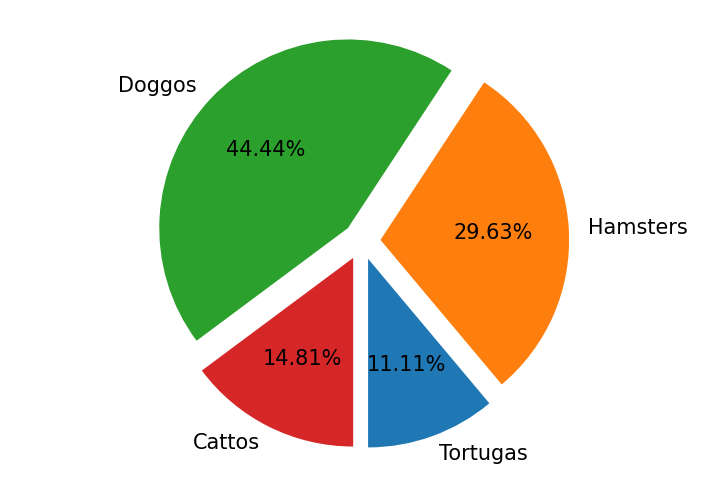

In [19]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = [15, 40, 60, 20] 
etiquetas = ["Tortugas","Hamsters","Doggos","Cattos"]
explotar = [0.1, 0.1,0.1, 0.1] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

## Otros tipos de Gráficos: Barras

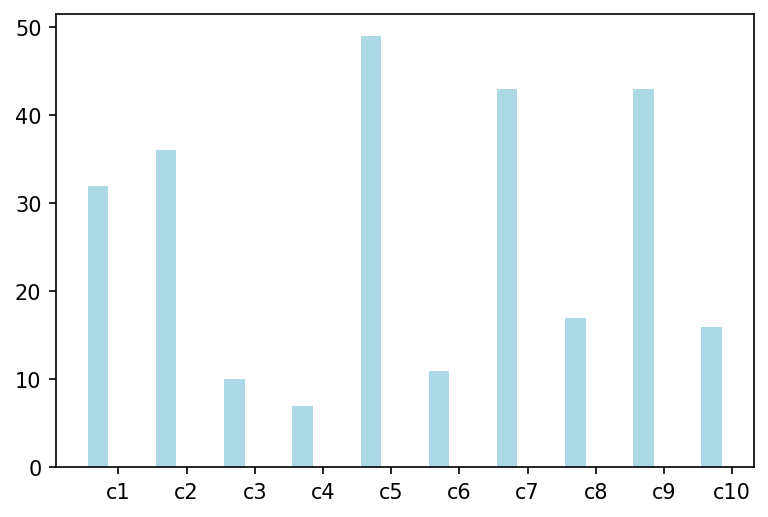

In [22]:
import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(111)

num = 10
x = arange(num) #rango de 0 a 10
#print(x)

ya = randint(0,50,num) #lista de numeros aleatoreos entre 0 y 50
yb = randint(0,50,num)
#print(ya, yb)

sep = 0.3

#barras - parametro 1: valores de x; parametro 2: valores en y; parametro 3: ancho de barra.
#print(x, ya, yb)
ax1.bar(x, ya, sep, color='lightblue')
#ax1.plot(x, ya, 'gD--', color='green')
#ax1.bar(x+sep, yb, sep, color='darkblue')

ax1.set_xticks(x+sep) #posición de etiquetas en x

ax1.set_xticklabels(["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]) #nombre de etiquetas en x

plt.show()

## Otros tipos de Gráficos: Histograma


* Podemos mostrar nuestros datos como un histograma.

[-0.47489641  0.89706232 -0.07019608 ... -1.72956163  0.5028208
  0.63647383]


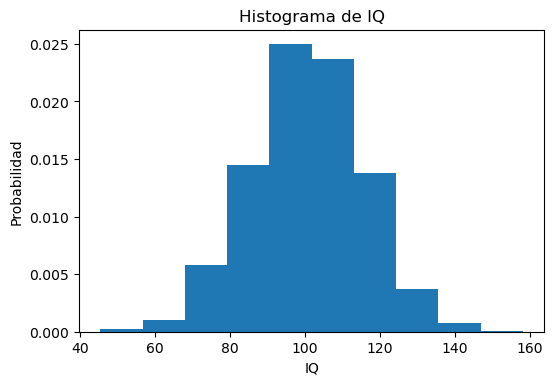

In [23]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

#seed(1) #semilla aleatoria fija, permite generar siempre los mismos números.

mu = 100 #media 
sigma = 15 #desviación estándar 

#Muestro desde distribución normal (0,1) adaptada a media y dev.est. de nuestro caso
x = mu + sigma * randn(2000)
print(randn(2000))

#datos histograma
num_bins = 10 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

#Histograma - 1er argumento: datos del muestreo; 2do argumento: numero de divisiones, 3ero: normalizacion.
#density = True, indica que suma de alturas de las divisiones es 1.
ax1.hist(x, num_bins, density=True)

ax1.set_xlabel("IQ")
ax1.set_ylabel("Probabilidad")
ax1.set_title("Histograma de IQ")

plt.show()

(array([57., 48., 51., 44.]),
 array([ 0.  , 24.75, 49.5 , 74.25, 99.  ]),
 <BarContainer object of 4 artists>)

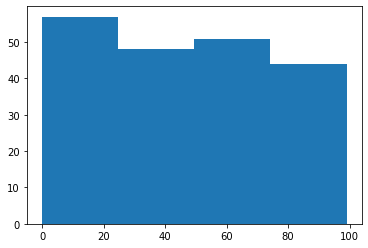

In [27]:
x = np.random.randint(low=0, high=100, size=200)
                      
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
                      
ax.hist(x, 4)

## Documentación y mucho más

* Existen muchos otros gráficos y código disponible para reutilizar en:

<h1><center> <a href="https://matplotlib.org/gallery.html">https://matplotlib.org/gallery.html</a></center></h1>

# Seaborn

- Es una biblioteca Python para visualización de datos basada en Matplotlib. 
- Provee una interfaz de alto nivel para la generación de gráficos atractivos e informativos
- Si está trabajando en su entorno local, previo a su importación debe ser **instalada** 
    - ```pip install seaborn``` si usa ```pip```
    - ```conda install seaborn``` si usa ```conda```

In [1]:
# Ten en cuenta que este cuaderno también está importando la biblioteca seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = 'athleteEventsNoPersonal.csv'
df = pd.read_csv(filename)
df.head()

,ID,Age,Height,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,27.0,185.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
yearFilter = df['Year'] == 2016
top20Height = df.loc[yearFilter, :].groupby(['NOC'])['Height'].mean().sort_values(ascending = False).head(20)
top20Height

NOC
BUR    199.000000
BIZ    199.000000
BEN    192.000000
GAB    190.000000
CAY    188.000000
CRO    187.125000
KOS    187.000000
LAT    187.000000
ISL    187.000000
VAN    187.000000
SRB    186.782609
LTU    186.600000
TGA    186.500000
BIH    186.000000
TKM    186.000000
CIV    185.000000
BOT    185.000000
DJI    185.000000
IRI    184.800000
PLW    184.000000
Name: Height, dtype: float64

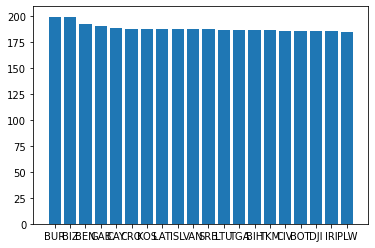

In [3]:
# Convierta datos de pandas para trazar usando matplotlib
# Ten en cuenta que no es el gráfico más legible
plt.bar(top20Height.index, top20Height.values);

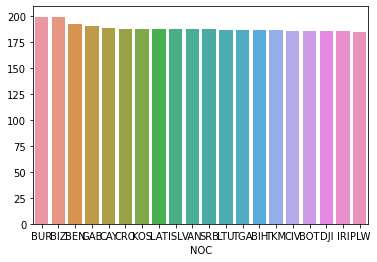

In [4]:
# Con seaborn, no es necesario convertir datos de pandas si tiene un marco de datos,
# sin embargo, nuestros datos son una serie pandas, debes convertirlos.
# Ten en cuenta que no es el gráfico más legible
sns.barplot(x = top20Height.index, y = top20Height.values);

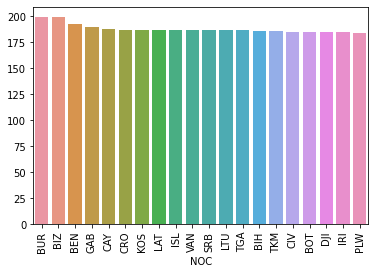

In [5]:
sns.barplot(x = top20Height.index, y = top20Height.values);
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='NOC'>

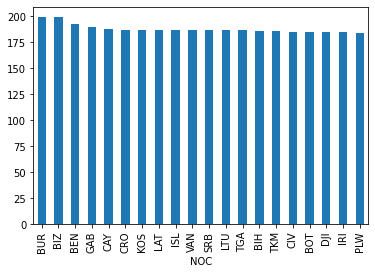

In [7]:
top20Height.plot.bar()

In [11]:
df.to_numpy()

array([[5, 21.0, 185.0, ..., 'Speed Skating',
        "Speed Skating Women's 500 metres", nan],
       [5, 21.0, 185.0, ..., 'Speed Skating',
        "Speed Skating Women's 1,000 metres", nan],
       [5, 25.0, 185.0, ..., 'Speed Skating',
        "Speed Skating Women's 500 metres", nan],
       ...,
       [135570, 27.0, 176.0, ..., 'Ski Jumping',
        "Ski Jumping Men's Large Hill, Team", nan],
       [135571, 30.0, 185.0, ..., 'Bobsleigh', "Bobsleigh Men's Four",
        nan],
       [135571, 34.0, 185.0, ..., 'Bobsleigh', "Bobsleigh Men's Four",
        nan]], dtype=object)

# Actividad 2

- En el archivo [notas-genero.csv](notas-genero.csv), se encuentran almacenados los nombres, nota final y genero de los estudiantes que han cursado una asignatura. Realice lo siguiente (preocúpese de la estética):

    1. Cargue la información de dicho archivo en un dataframe pandas.
    2. Con la información extraída, genere un **histograma** de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar.
    3. Ordene las notas y genere **un gráfico** (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
    4. Genere **dos gráficos de torta** en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.